### Kaynaklar
https://miracozturk.com/python-ile-siniflandirma-analizleri-yapay-sinir-aglari-ysa/

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
import tensorflow as tf
from scipy.io import wavfile as wav
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('sound_split/metadata_20_mfcc.csv')

X = dataset.iloc[:,].values[:,1:20]
y = dataset.iloc[:, 0].values
unique_class = dataset['class_name'].unique()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neural_network import MLPClassifier
mlpcl = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), max_iter=10000)
hist = mlpcl.fit(X_train, y_train.ravel())

In [16]:
hist.score(X_train,y_train)

0.9541284403669725

In [7]:
predictions = mlpcl.predict(X_test)

In [8]:
predictions

array(['tatarca', 'turkmence', 'azerbaycan', ..., 'uygurca', 'uygurca',
       'azerbaycan'], dtype='<U10')

In [9]:
y_test

array(['tatarca', 'turkmence', 'azerbaycan', ..., 'uygurca', 'uygurca',
       'azerbaycan'], dtype=object)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[147,   0,   2,   1,   1,   3,   3],
       [  1, 150,   3,   5,   2,   0,   2],
       [  4,   9,  86,   1,  10,   4,   0],
       [  0,   2,   1,  99,   4,   4,   2],
       [  1,   3,   6,   2,  66,   0,   0],
       [  4,   0,   2,   1,   1, 203,   1],
       [  4,   0,   1,   0,   3,   0, 192]])

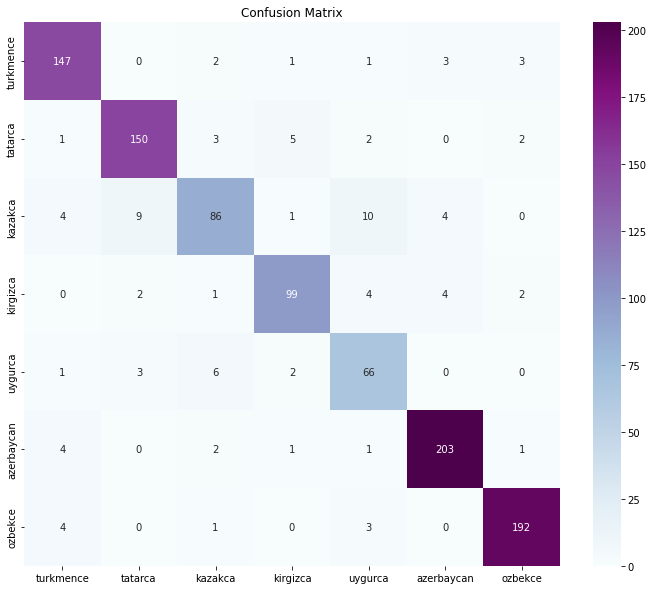

In [11]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in unique_class],
                  columns = [i for i in unique_class])
plt.figure(figsize = (12,10))
plt.title("Confusion Matrix")
ss = sn.heatmap(df_cm, annot=True,fmt="d", cmap="BuPu")
figure = ss.get_figure()    
figure.savefig('ysa_conf.png', dpi=400)

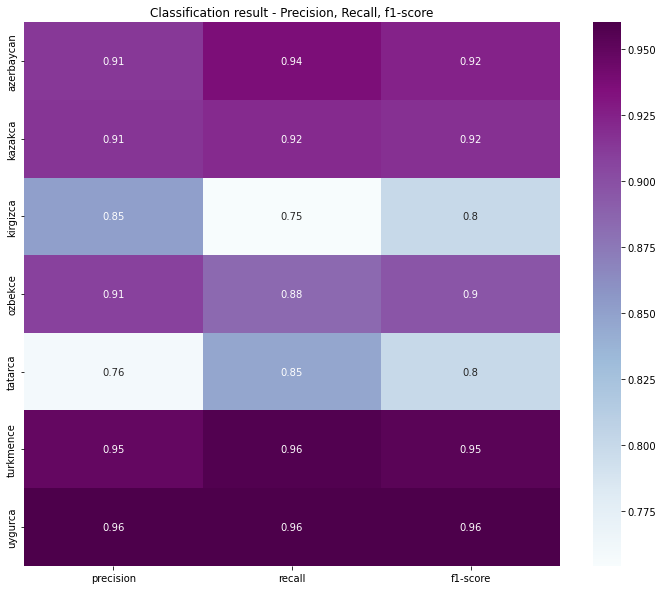

In [13]:
from sklearn.metrics import classification_report
a = classification_report(y_test,predictions,output_dict=True)
df_prf = pd.DataFrame(a).transpose()

df_class_prf = pd.DataFrame(df_prf, index = ['azerbaycan','kazakca','kirgizca','ozbekce','tatarca','turkmence','uygurca'],
                  columns = ['precision','recall','f1-score'])
plt.figure(figsize = (12,10))
plt.title("Classification result - Precision, Recall, f1-score")
s_cls = sn.heatmap(df_class_prf, annot=True,fmt=".2g", cmap="BuPu")

figure = s_cls.get_figure()    
figure.savefig('ysa_prf.png', dpi=400)

In [18]:
from sklearn.metrics import f1_score
# f1 score
score = f1_score(predictions, y_test,pos_label='positive',
                                           average='macro')
score

0.8929912485071122

In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Precision Score : ",precision_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='macro'))

Precision Score :  0.8935197820496319
Recall Score :  0.8940809547947287
